<a href="https://colab.research.google.com/github/andressakuibida/Desafio_ENEM2018/blob/master/Desafio_quarentenaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #Extração dos dados

In [0]:
import pandas as pd
import numpy as np

np.random.seed(43267)

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

URI_TREINO = "https://github.com/tgcsantos/quaretenadados/blob/master/DADOS_TREINO.csv?raw=true"
URI_TESTE = "https://github.com/tgcsantos/quaretenadados/raw/master/DADOS_TESTE.csv"
URI_DESAFIOQT = "https://github.com/tgcsantos/quaretenadados/raw/master/DESAFIOQT.csv"
URI_VALIDACAO = "https://raw.githubusercontent.com/guilhermesilveira/enem-2018/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv"

dados_treino = pd.read_csv(URI_TREINO)
dados_teste = pd.read_csv(URI_TESTE)
dados_desafioqt = pd.read_csv(URI_DESAFIOQT)
dados_validacao = pd.read_csv(URI_VALIDACAO)

erro_treino = "Erro ao carregar dados de treino"
erro_teste = "Erro ao carregar dados de teste"
erro_desafioqt = "Erro ao carregar dados de submissão"

assert dados_treino.shape == (150000, 5), erro_treino
assert dados_teste.shape == (20000, 5), erro_teste
assert dados_desafioqt.shape == (10000, 5), erro_desafioqt

colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_valid_sample = dados_validacao[colunas_de_notas].sample(n=20000, random_state=0)

dados_valid_sample.dropna(inplace=True)
colunas_ = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_treino.columns = colunas_
dados_teste.columns = colunas_ 
dados_valid_sample.columns = colunas_
dados_desafioqt.columns =  ['ID', 'ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']

#Separando dados treinoXteste
coluna_label = 'linguagem_codigo'
coluna_features = ['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']

X_treino = dados_treino[coluna_features].to_numpy()
Y_treino = dados_treino[coluna_label].to_numpy()

X_teste = dados_teste[coluna_features].to_numpy()
Y_teste = dados_teste[coluna_label].to_numpy()

X_valid = dados_treino[coluna_features].to_numpy()
Y_valid = dados_treino[coluna_label].to_numpy()

In [0]:
dados_validacao2 = "/content/DADOS_VALIDACAO_SEED_845309.csv"
dados_validacao2 = pd.read_csv(dados_validacao2)
dados_validacao2 = dados_validacao2[colunas_de_notas]
dados_validacao2.columns = colunas_

X_valid2 = dados_validacao2[coluna_features].to_numpy()
Y_valid2 = dados_validacao2[coluna_label].to_numpy()

# #Exploração



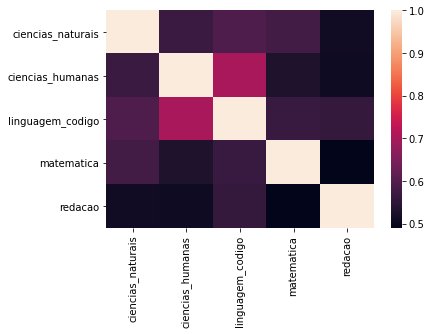

In [15]:
import seaborn as sns 
corr = dados_treino.corr()
sns.heatmap(corr)

In [0]:
from string import ascii_letters
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  center=0,
            square=True, cbar_kws={"shrink": .8})
plt.yticks(rotation=0,fontsize=12)
plt.xticks(rotation=90,fontsize=12)

In [0]:
sns.pairplot(dados_teste)
plt.figure(figsize=(10,5))

In [0]:
dados_treino_com_media.query("matematica == 0 | linguagem_codigo == 0 | ciencias_naturais == 0 | ciencias_humanas == 0 | redacao == 0 ")


In [0]:
aux3.head()

In [0]:

#sn.barplot(x=dados_treino.columns,y=dados_treino[])
dados_treino_aux = dados_treino.reset_index().rename(columns={'index': 'Aluno'})

plot_dados_treino = pd.melt(dados_treino_aux, id_vars="Aluno", var_name="Disciplina", value_name="Nota")


barplot = sns.catplot(x='Aluno',
                      y='Nota',
                      hue='Disciplina',
                      data=plot_dados_treino.query("Aluno < 10"), kind="bar", legend=False,
                      palette='Set1', height=10, aspect=2)
barplot.ax.legend(loc=2, fontsize=12)
plt.figure(figsize=(5, 5))
plt.show()


In [0]:
sns.pairplot(dados_treino)

In [0]:
dados_teste.head()

# #Aplicando ML

In [0]:
#Verificando se tem aluno zerado em todas as materias
aux = dados_treino.loc[:] == 0
aux2= aux.query("matematica == True & linguagem_codigo == True & ciencias_naturais == True & ciencias_humanas == True & redacao == 0 ")


aux3= dados_treino.query("matematica == 0 | linguagem_codigo == 0 | ciencias_naturais == 0 | ciencias_humanas == 0 | redacao == 0 ")
aux3.head()
dados_treino_sem_zeros = dados_treino.drop(aux3.index,axis=0)
dados_treino_sem_zeros.head()


aux4= dados_teste.query("matematica == 0 | linguagem_codigo == 0 | ciencias_naturais == 0 | ciencias_humanas == 0 | redacao == 0 ")
aux4.head()
dados_teste_sem_zeros = dados_treino.drop(aux4.index,axis=0)

#Separando dados treinoXteste
coluna_label = 'linguagem_codigo'
coluna_features = ['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']

X_treino_sem_zero = dados_treino_sem_zeros[coluna_features].to_numpy()
Y_treino_sem_zero = dados_treino_sem_zeros[coluna_label].to_numpy()

In [23]:
#Substituindo zeros pela média
nonzero_mean_treino = dados_treino[dados_treino.iloc[:,:] != 0].mean()
nonzero_mean_teste = dados_teste[ dados_teste.iloc[:,:] != 0 ].mean()
nonzero_mean_desafio = dados_desafioqt[ dados_desafioqt.iloc[:,:] != 0 ].mean()

dados_treino_com_media = dados_treino_sem_zeros.copy()
dados_teste_com_media = dados_teste_sem_zeros.copy()
dados_desafioqt_com_media = dados_desafioqt.copy()

for i in range(5):
  dados_treino_com_media.iloc[:,i].replace(0,nonzero_mean_treino[i], inplace=True)
  dados_teste_com_media.iloc[:,i].replace(0,nonzero_mean_teste[i], inplace=True)
  dados_desafioqt_com_media.iloc[:,i].replace(0,nonzero_mean_desafio[i], inplace=True)

X_treino_media = dados_treino_com_media[coluna_features].to_numpy()
Y_treino_media = dados_treino_com_media[coluna_label].to_numpy()

X_teste_media = dados_teste_com_media[coluna_features].to_numpy()
Y_teste_media = dados_teste_com_media[coluna_label].to_numpy()

X_desafioqt = dados_desafioqt_com_media[coluna_features].to_numpy()
X_teste_media

array([[530.7      , 586.5      , 539.       , 520.       ],
       [439.4      , 577.9      , 488.7      , 380.       ],
       [414.1      , 548.8      , 382.6      , 600.       ],
       ...,
       [471.       , 558.7      , 542.9      , 460.       ],
       [476.7      , 463.5      , 434.       , 527.4531242],
       [637.8      , 611.5      , 731.7      , 600.       ]])

In [52]:

#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

# Define model. Specify a number for random_state to ensure same results each run
decisionTreeRegressor_model = DecisionTreeRegressor(random_state=1)

# Fit model
decisionTreeRegressor_model.fit(X_treino_media, Y_treino_media)

#Predicao
decisionTreeRegressor_predict = decisionTreeRegressor_model.predict(X_valid2)
score = decisionTreeRegressor_model.score(X_valid2,Y_valid2)
avaliacao_TreeRegressor = mean_squared_error(Y_valid2, decisionTreeRegressor_predict)
print(f"Minha avaliação nos dados de teste foi de {avaliacao_TreeRegressor, score}")

Minha avaliação nos dados de teste foi de (4275.785669, 0.17577583599122315)


In [0]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

for i in range (20):
  
  forest_model1 = RandomForestRegressor(random_state=1, max_depth=i+1)
  forest_model1.fit(X_treino, Y_treino)
  forest_predict = forest_model1.predict(X_teste)
  avaliacao_forest = mean_squared_error(Y_teste, forest_predict)
  score = forest_model1.score(X_teste,Y_teste)


  print(f"Minha avaliação nos dados de teste foi de {avaliacao_forest,score}")

In [0]:
forest_model1.score(X_valid,Y_valid)

In [40]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

forest_model2 = RandomForestRegressor(random_state=1, max_depth=10)

forest_model2.fit(X_treino_media, Y_treino_media)

forest_predict = forest_model2.predict(X_valid2)
avaliacao_forest = mean_squared_error(Y_valid2, forest_predict)
score = forest_model2.score(X_valid2,Y_valid2)
print("Minha avaliação nos dados de teste {} foi de {:.4}".format(avaliacao_forest,score))

Minha avaliação nos dados de teste 2062.46946557452 foi de 0.6024


In [41]:
forest_model2.score(X_valid2,Y_valid2)

0.60

In [51]:
from sklearn import ensemble

clf_et = ensemble.ExtraTreesRegressor(random_state=42,n_estimators=200)
clf_et.fit(X_treino_media, Y_treino_media)
print("score: ", clf_et.score(X_valid2,Y_valid2))


score:  0.5533713517503994


In [53]:
from sklearn.ensemble import GradientBoostingRegressor
SEED = 0xCAFEF0DA
np.random.seed(SEED)

params = {
    'loss': 'huber',
    'criterion': 'mse',
    'n_estimators': 173,
    'learning_rate': 0.1,
    'min_samples_split': 4,
    'min_samples_leaf': 1,
    'max_depth': 4,
    'random_state': SEED
}

model = GradientBoostingRegressor(**params)
model.fit(X_treino_sem_zero, Y_treino_sem_zero)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=173,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=3405705434, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [54]:
from sklearn.metrics import mean_squared_error
print(model.score(X_valid2, Y_valid2),mean_squared_error(Y_valid2,model.predict(X_valid2) ))

0.5970521693525532 2090.3519150145235


In [38]:
from sklearn.metrics import mean_squared_error
print(model.score(X_teste_media, Y_teste_media),mean_squared_error(Y_teste_media,model.predict(X_teste_media) ))

0.6190819226770008 1953.683172081029


 ##  SVM

 

In [0]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_scaler = StandardScaler()
y_scaler = StandardScaler()
   
X_train = X_scaler.fit_transform(X_treino)
y_treino = Y_treino.reshape(-1, 1)
y_train = y_scaler.fit_transform(y_treino)

X_test = X_scaler.transform(X_teste)
y_teste = Y_teste.reshape(-1, 1)
y_test = y_scaler.transform(y_teste)

regressor = SGDRegressor(alpha=0.0013)
  
#scores = cross_val_score(regressor, X_train, y_train, cv=5)
#print ("Cross validation r-squared scores:", scores)
#print ("Average cross validation r-squared score:", np.mean(scores))
    
regressor.fit(X_train, y_train)
print ("score:", regressor.score(X_test, y_test))

In [0]:
import math
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)


In [0]:
import time
inicio = time.time()

svr_rbf.fit(X_treino, Y_treino)

#svr_rbf.score(X_teste,Y_teste)

#svr_rbf_pred = svr_rbf.predict(X_teste)
#svr_rbf_MSE = mean_squared_error(Y_teste, svr_rbf_pred)

#print(f"Minha avaliação nos dados de teste foi de {svr_rbf_MSE,svr_rbf_pred}")

fim = time.time()
print(fim - inicio)

In [0]:
print(range(1,20,1))

In [0]:
d = pd.read_csv("DADOS_VALIDACAO_SEED_845309.csv")
Y_valid2 = d['NU_NOTA_LC'] 
X_valid2 = d[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
X_valid2.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO
0,496.10,585.30,495.80,320.00
1,558.50,641.90,515.90,600.00
2,493.10,566.60,512.00,520.00
3,410.90,534.40,437.60,340.00
4,453.50,577.90,545.80,580.00


#Final

In [0]:
#atribuir ao MODELO o nome do seu melhor modelo
from google.colab import files

MODELO = forest_model2
X_desafioqt = dados_desafioqt[coluna_features].to_numpy()
predicao_desafioqt = MODELO.predict(X_desafioqt)

desafio_df = pd.DataFrame(dados_desafioqt.ID)
desafio_df[coluna_label] = predicao_desafioqt
desafio_df.columns = ['ID', 'NU_NOTA_LC']

#NÃO TROCAR O NOME DO ARQUIVO DE SAÍDA (PREDICAO_DESAFIO)
desafio_df.to_csv('PREDICAO_DESAFIOQT.csv', index=False) 
files.download('PREDICAO_DESAFIOQT.csv')

In [0]:
dados_desafioqt = pd.read_csv(URI_DESAFIOQT)
dados_desafioqt
desafio_df